# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task, Target, Hover

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Hover(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

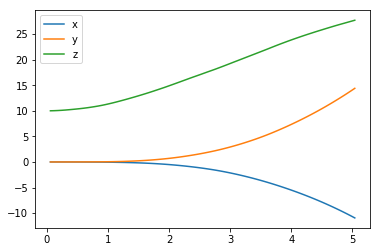

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

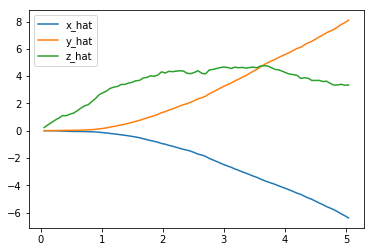

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

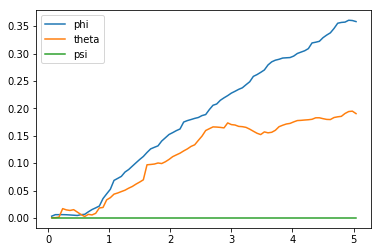

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

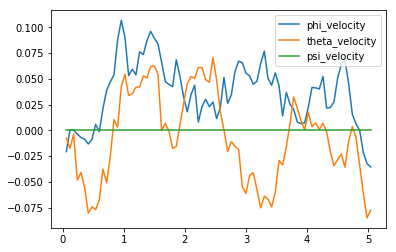

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

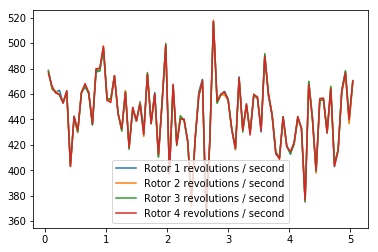

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-10.94489321  14.39889807  27.71677041   0.35833737   0.19035105   0.        ]
[-6.39486145  8.09971795  3.35331634]
[-0.0355562  -0.07763242  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
# import numpy as np
# import sys
# import pandas as pd
# from agents.policy_search import PolicySearch_Agent
# from task import Task, Target, Land

# num_episodes = 1000
# target_pos = np.array([0., 0., 10.])
# task = Land(target_pos=target_pos)
# agent = PolicySearch_Agent(task) 
# print(agent.state_size)

# for i_episode in range(1, num_episodes+1):
#     state = agent.reset_episode() # start a new episode
#     while True:
#         action = agent.act(state) 
#         next_state, reward, done = task.step(action)
#         agent.step(reward, done)
#         state = next_state
#         if done:
#             print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
#                 i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
#             break
#     sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [14]:
# initial single unit training


# import csv
# import sys
# import math
# import pandas as pd
# import tensorflow as tf
# from agents.agent import DeepLearnAgent
# from task import Task, Target, Land

# num_episodes = 100
# task = Land(action_size=4)
# agent = DeepLearnAgent(
#     task, actor_lr=0.001, critic_lr=0.001) 
# try:
#     sess.close()
# except:
#     pass


# labels = ['episode', 'avg_reward', 'best_reward', 'num_timesteps', 'avg_speed']
# file_output = 'learning_data.txt'                         # file name for saved results

# plot_data = {x : [] for x in labels}
# try:
#     # Run the simulation, and save the results.
#     with open(file_output, 'w') as csvfile:
#         writer = csv.writer(csvfile)
#         writer.writerow(labels)
#         with agent.graph.as_default() as graph:
#             sess = tf.Session(graph=graph)
#             sess.run(tf.global_variables_initializer())

#             agent.sess = sess
#             for episode in range(num_episodes):
#                 print("Episode #: {}".format(episode))
#                 state = agent.reset_episode()
#                 results = agent.act_many_times(task, state)
#                 agent.learn_from_experiences()

#                 if not episode % 10:
#                     agent.do_periodic_update(
#                         critic_update_rate=0.25, 
#                         target_update_rate=0.25)
#                 row = dict(
#                     episode=episode,
#                     avg_reward=agent.total_reward/agent.count,
#                     best_reward=agent.best_reward, 
#                     num_timesteps=agent.count,
#                     avg_speed=agent.total_speed/agent.count)

#                 if row['avg_speed'] == 0:
#                     raise ValueError("Model has died out.")

#                 for k,v in plot_data.items():
#                     v.append([row[k]])
#                 writer.writerow(row)
# except:
#     pass

In [ ]:
# iterate over variations in the hyperparameter space to look for configurations where the model does not die
activations = [
    
    'elu', 
    'relu', 
    'selu', 
    'tanh', 
#    'sigmoid'
]
initializers = ['truncated_normal', 
                 'glorot_normal',
                'random_normal', 
                # 'random_uniform', 
                  
                # 'glorot_uniform', 
                #'he_normal', 
                #'lecun_normal' 
               ]

architectures = [
    [16, 32, 16],
    [8, 16, 8],
    [24, 16],
]

action_sizes = [4]


# check hyperparams an order of magnitude or so apart,
# and let target and critic vary from each other by double/half
# in each direction.  (to avoid situations where one is far beyond the other) 
# possibly expand these search parameters if unsuccessful -- maybe one should 
# in fact be greatly different than the other

learn_rates = [0.00001, 0.0001]
actor_critic_ratios = [2, 1, 0.5]
update_rates = [0.01, 0.025]
noise_ratios = [0.1, 0.05]

all_permutations = []
for critic_lr in learn_rates:
    for learn_ratio in actor_critic_ratios:
        actor_lr = critic_lr * learn_ratio
        for critic_update_rate in update_rates:
            for update_ratio in actor_critic_ratios: 
                actor_update_rate = critic_update_rate * update_ratio
                for action_size in action_sizes:
                    for noise_ratio in noise_ratios:
                        permutation = dict(
                            critic_lr=critic_lr, 
                            actor_lr=actor_lr, 
                            critic_update_rate=critic_update_rate,
                            actor_update_rate=actor_update_rate,
                            action_size=action_size,
                            noise_ratio=noise_ratio)
                        all_permutations.append(permutation)


# all_permutations = []
# for actor_activation, critic_activation in zip(activations, activations):
#     for actor_initializer, critic_initializer in zip(initializers, initializers):
#         for (actor_neuron_counts, 
#              critic_state_neuron_counts, 
#              critic_action_neuron_counts, 
#              critic_combined_neuron_counts) in zip(
#             architectures, architectures, 
#             architectures, architectures,):
#             for action_size in action_sizes:
#                 permutation = dict(
#                     actor_activation=actor_activation, 
#                     critic_activation=critic_activation, 
#                     actor_initializer=actor_initializer, 
#                     critic_initializer=critic_initializer,
#                     actor_neuron_counts=actor_neuron_counts,
#                     critic_state_neuron_counts=critic_state_neuron_counts,
#                     critic_action_neuron_counts=critic_action_neuron_counts,
#                     critic_combined_neuron_counts=critic_combined_neuron_counts,
#                     action_size=action_size,
#                 )
#                 all_permutations.append(permutation)


print(len(all_permutations))

In [21]:


def plot_episode_results(plot_data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    for n,(k,v) in enumerate(plot_data.items()):
        if k == 'episode':
            # don't plot episode against itself
            continue
            
        plt.figure(n)
            
        plt.plot(plot_data['episode'], plot_data[k], label=k.upper())
        plt.ylabel(k.upper())
        plt.xlabel("Episodes Survived")
        
        plt.legend()
        plt.show()
    
    
def display_permutation_info(permutation):
    print("Permutation Info:")
    print("===============================")
    print("")
    for k,v in permutation.items():
        print(k.upper())
        print("-----------------")
        print(v)
        print("")
    print("")
    print("")


def try_a_permutation(permutation, sess, agent=None, num_episodes=10):

    from agents.agent import DeepLearnAgent
    from task import Task, Target, Hover
    import tensorflow as tf
    
    class Perm(object):
        def __init__(self, permutation):
            self.__dict__ = permutation
    
    p = Perm(permutation)
    
    if agent is None:
        
        task = Hover(action_size=p.action_size, hover_height=10 + np.random.randint(-2, 2))
        agent = DeepLearnAgent(
            task, 
            verbose=False,
            **permutation,
            ) 
        
    agent.sess = sess

    labels = ['episode', 'avg_reward', 'best_reward', 'num_timesteps', 'avg_speed', 'avg_height', 'avg_height_error']
#     file_output = 'learning_data.txt'                         # file name for saved results

    plot_data = {x : [] for x in labels}

#     # Run the simulation, and save the results.
#     with open(file_output, 'w') as csvfile:
#         writer = csv.writer(csvfile)
#         writer.writerow(labels)


    for episode in range(num_episodes):
        
        task = Hover(action_size=p.action_size, hover_height=10)
        agent.task = task
        state = agent.reset_episode()
        try:
            results = agent.act_many_times(task, state, n=50)
        except ValueError as ex:
            if "dead" in str(ex):
                break
            else:
                raise

        for n in range(2):
            # print("Trying to learn from {} experiences".format(len(agent.memory)))
            agent.learn_from_experiences()

        if True: # try getting more Learning from each round, hopefully improve?
            agent.do_periodic_update(
                critic_update_rate=p.critic_update_rate, 
                actor_update_rate=p.actor_update_rate)
        row = dict(
            episode=episode,
            avg_reward=agent.total_reward/agent.count,
            best_reward=agent.best_reward, 
            num_timesteps=agent.count,
            avg_speed=agent.total_speed/agent.count,
            avg_height=agent.total_height/agent.count,
            avg_height_error=agent.total_height_error/agent.count)

        print("Episode #{}: Avg reward: {}, Num_Timesteps {}, Avg_speed: {}, Avg_Height: {}, Avg_Height_Error: {}".format(
            episode, 
            np.round(row["avg_reward"],2),
            np.round(row["num_timesteps"],2), 
            np.round(row["avg_speed"],2), 
            np.round(row["avg_height"],2), 
            np.round(row["avg_height_error"],2)))
        if row['avg_speed'] == 0:
            break

        for k,v in plot_data.items():
            v.append([row[k]])
            
    print("I Survived {} episodes".format(episode))
    display_permutation_info(permutation)
    plot_episode_results(plot_data)
    return agent, plot_data, episode

Episode #0: Avg reward: -4.83, Num_Timesteps 50, Avg_speed: 457.89, Avg_Height: 12.93, Avg_Height_Error: 2.93
Episode #1: Avg reward: -4.66, Num_Timesteps 50, Avg_speed: 451.97, Avg_Height: 12.95, Avg_Height_Error: 2.95
Episode #2: Avg reward: -3.51, Num_Timesteps 50, Avg_speed: 452.13, Avg_Height: 12.58, Avg_Height_Error: 2.58
Episode #3: Avg reward: -0.62, Num_Timesteps 50, Avg_speed: 440.52, Avg_Height: 11.93, Avg_Height_Error: 1.93
Episode #4: Avg reward: 2.45, Num_Timesteps 50, Avg_speed: 436.97, Avg_Height: 11.28, Avg_Height_Error: 1.28
Episode #5: Avg reward: 10.31, Num_Timesteps 50, Avg_speed: 426.54, Avg_Height: 10.54, Avg_Height_Error: 0.54
Episode #6: Avg reward: 11.22, Num_Timesteps 50, Avg_speed: 428.61, Avg_Height: 10.56, Avg_Height_Error: 0.56
Episode #7: Avg reward: 5.58, Num_Timesteps 50, Avg_speed: 429.99, Avg_Height: 11.03, Avg_Height_Error: 1.03
Episode #8: Avg reward: 2.34, Num_Timesteps 50, Avg_speed: 434.23, Avg_Height: 11.33, Avg_Height_Error: 1.33
Episode #9: A

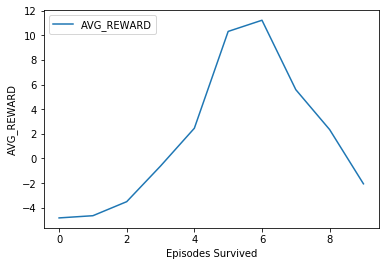

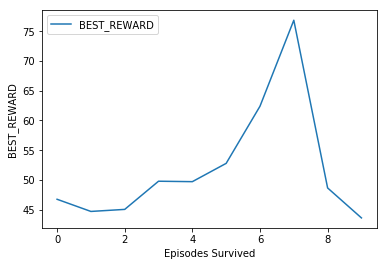

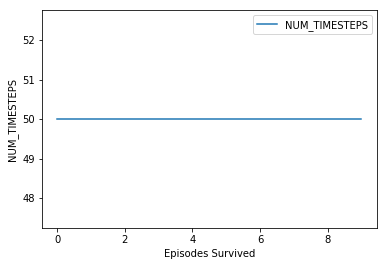

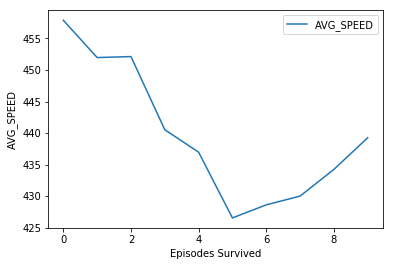

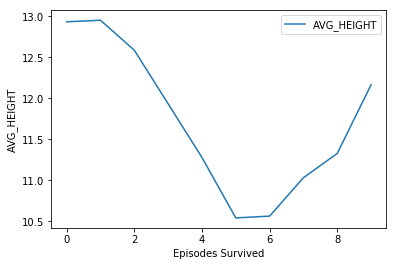

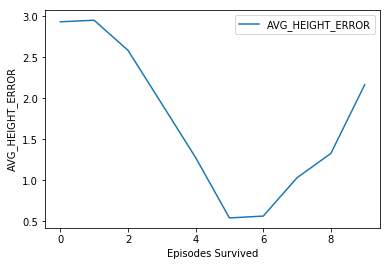

Permutation #: 0
Episode #0: Avg reward: -6.56, Num_Timesteps 50, Avg_speed: 439.63, Avg_Height: 13.69, Avg_Height_Error: 3.69
Episode #1: Avg reward: -6.38, Num_Timesteps 50, Avg_speed: 440.58, Avg_Height: 13.57, Avg_Height_Error: 3.57
Episode #2: Avg reward: -5.96, Num_Timesteps 50, Avg_speed: 437.21, Avg_Height: 13.52, Avg_Height_Error: 3.52
Episode #3: Avg reward: -3.49, Num_Timesteps 50, Avg_speed: 430.48, Avg_Height: 12.68, Avg_Height_Error: 2.68
Episode #4: Avg reward: -3.58, Num_Timesteps 50, Avg_speed: 419.77, Avg_Height: 12.62, Avg_Height_Error: 2.62
Episode #5: Avg reward: -3.67, Num_Timesteps 50, Avg_speed: 395.93, Avg_Height: 12.24, Avg_Height_Error: 2.24
Episode #6: Avg reward: 9.24, Num_Timesteps 50, Avg_speed: 388.04, Avg_Height: 10.7, Avg_Height_Error: 0.7
Episode #7: Avg reward: 21.75, Num_Timesteps 50, Avg_speed: 384.68, Avg_Height: 10.27, Avg_Height_Error: 0.27
Episode #8: Avg reward: 5.73, Num_Timesteps 50, Avg_speed: 384.1, Avg_Height: 10.85, Avg_Height_Error: 0.8

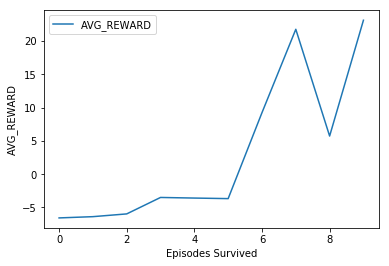

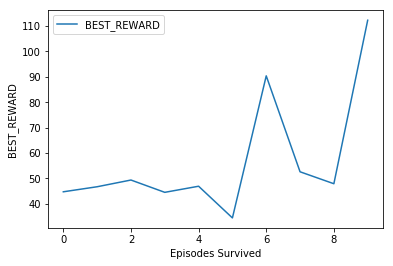

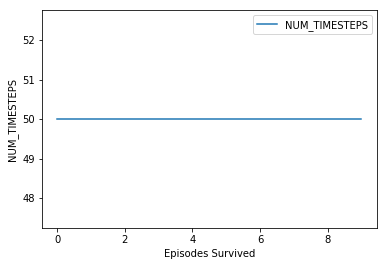

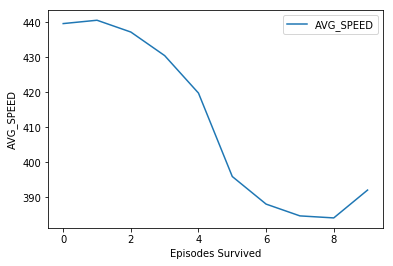

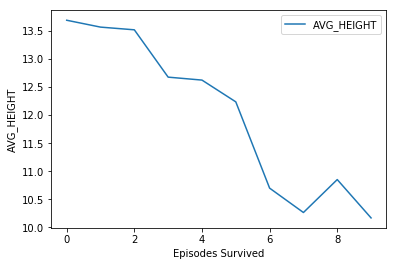

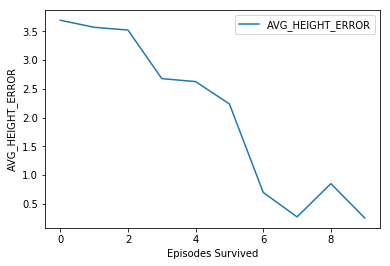

Permutation #: 1
Episode #0: Avg reward: -2.69, Num_Timesteps 50, Avg_speed: 447.57, Avg_Height: 12.51, Avg_Height_Error: 2.51
Episode #1: Avg reward: -1.34, Num_Timesteps 50, Avg_speed: 448.28, Avg_Height: 12.14, Avg_Height_Error: 2.14
Episode #2: Avg reward: -2.81, Num_Timesteps 50, Avg_speed: 441.67, Avg_Height: 12.14, Avg_Height_Error: 2.14
Episode #3: Avg reward: 0.96, Num_Timesteps 50, Avg_speed: 428.1, Avg_Height: 11.63, Avg_Height_Error: 1.63
Episode #4: Avg reward: 1.87, Num_Timesteps 50, Avg_speed: 418.14, Avg_Height: 11.23, Avg_Height_Error: 1.23
Episode #5: Avg reward: 7.12, Num_Timesteps 50, Avg_speed: 403.12, Avg_Height: 10.65, Avg_Height_Error: 0.65
Episode #6: Avg reward: 3.72, Num_Timesteps 50, Avg_speed: 401.12, Avg_Height: 11.03, Avg_Height_Error: 1.03
Episode #7: Avg reward: 14.22, Num_Timesteps 50, Avg_speed: 405.74, Avg_Height: 10.54, Avg_Height_Error: 0.55
Episode #8: Avg reward: 17.09, Num_Timesteps 50, Avg_speed: 410.37, Avg_Height: 10.52, Avg_Height_Error: 0.5

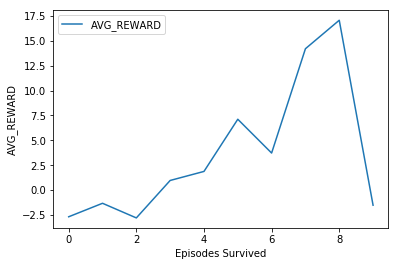

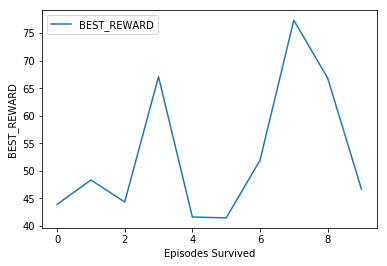

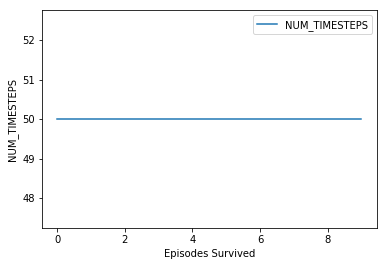

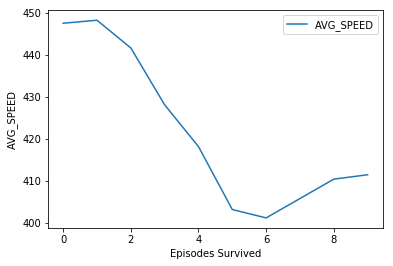

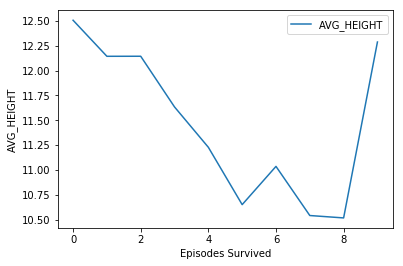

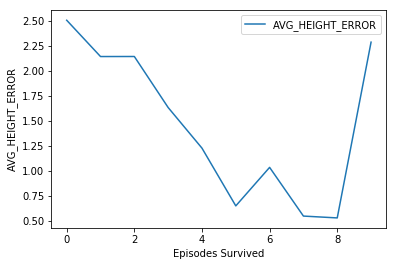

Permutation #: 2
Episode #0: Avg reward: -7.09, Num_Timesteps 50, Avg_speed: 452.88, Avg_Height: 13.65, Avg_Height_Error: 3.65
Episode #1: Avg reward: -4.89, Num_Timesteps 50, Avg_speed: 451.78, Avg_Height: 13.66, Avg_Height_Error: 3.66
Episode #2: Avg reward: -5.05, Num_Timesteps 50, Avg_speed: 442.55, Avg_Height: 13.07, Avg_Height_Error: 3.07
Episode #3: Avg reward: -3.38, Num_Timesteps 50, Avg_speed: 434.58, Avg_Height: 12.87, Avg_Height_Error: 2.87
Episode #4: Avg reward: -4.88, Num_Timesteps 50, Avg_speed: 431.3, Avg_Height: 13.02, Avg_Height_Error: 3.02
Episode #5: Avg reward: -3.18, Num_Timesteps 50, Avg_speed: 419.58, Avg_Height: 12.41, Avg_Height_Error: 2.41
Episode #6: Avg reward: 2.8, Num_Timesteps 50, Avg_speed: 406.33, Avg_Height: 11.34, Avg_Height_Error: 1.34
Episode #7: Avg reward: 4.9, Num_Timesteps 50, Avg_speed: 390.5, Avg_Height: 11.43, Avg_Height_Error: 1.43
Episode #8: Avg reward: 23.57, Num_Timesteps 50, Avg_speed: 396.77, Avg_Height: 10.2, Avg_Height_Error: 0.24


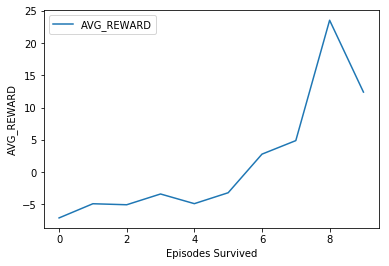

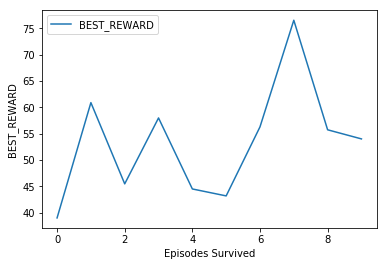

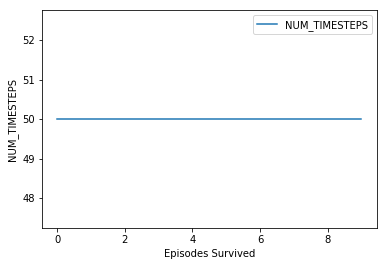

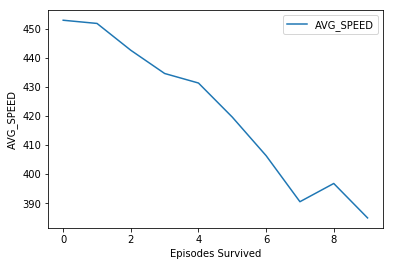

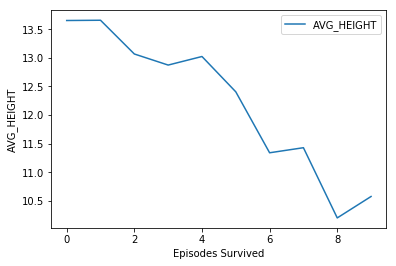

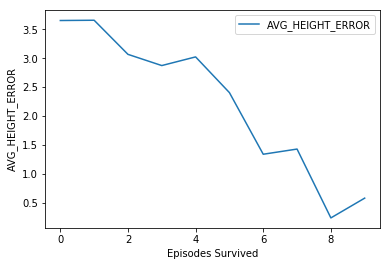

Permutation #: 3
Episode #0: Avg reward: -11.04, Num_Timesteps 50, Avg_speed: 448.35, Avg_Height: 15.64, Avg_Height_Error: 5.64
Episode #1: Avg reward: -11.98, Num_Timesteps 50, Avg_speed: 440.6, Avg_Height: 16.3, Avg_Height_Error: 6.3
Episode #2: Avg reward: -8.43, Num_Timesteps 50, Avg_speed: 432.79, Avg_Height: 14.24, Avg_Height_Error: 4.24
Episode #3: Avg reward: -7.03, Num_Timesteps 50, Avg_speed: 422.32, Avg_Height: 13.64, Avg_Height_Error: 3.64
Episode #4: Avg reward: -2.26, Num_Timesteps 50, Avg_speed: 412.0, Avg_Height: 13.03, Avg_Height_Error: 3.03
Episode #5: Avg reward: 3.29, Num_Timesteps 50, Avg_speed: 404.96, Avg_Height: 11.13, Avg_Height_Error: 1.13
Episode #6: Avg reward: -0.43, Num_Timesteps 50, Avg_speed: 379.98, Avg_Height: 11.61, Avg_Height_Error: 1.61
Episode #7: Avg reward: 9.94, Num_Timesteps 50, Avg_speed: 366.07, Avg_Height: 10.76, Avg_Height_Error: 0.76
Episode #8: Avg reward: -1.52, Num_Timesteps 50, Avg_speed: 351.79, Avg_Height: 11.92, Avg_Height_Error: 1.

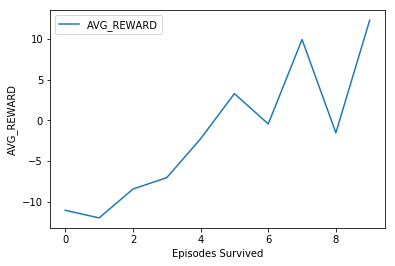

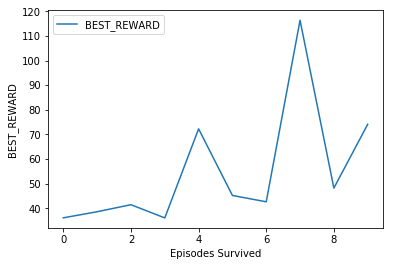

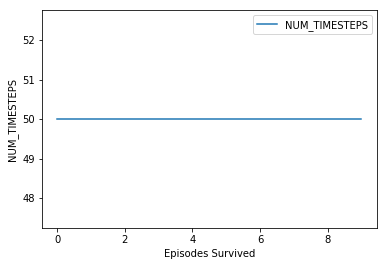

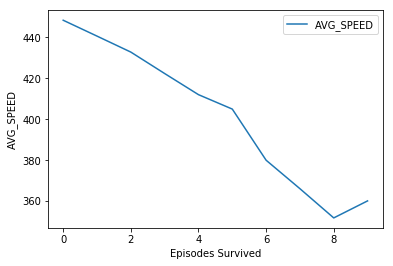

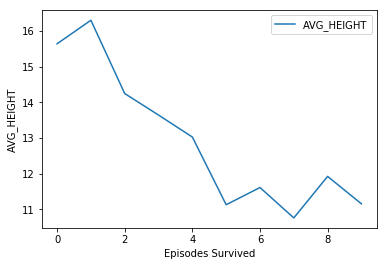

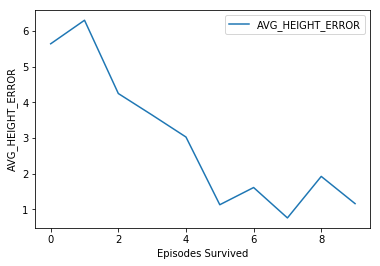

Permutation #: 4
Episode #0: Avg reward: -7.77, Num_Timesteps 50, Avg_speed: 453.73, Avg_Height: 14.24, Avg_Height_Error: 4.24
Episode #1: Avg reward: -6.53, Num_Timesteps 50, Avg_speed: 451.34, Avg_Height: 13.53, Avg_Height_Error: 3.53
Episode #2: Avg reward: -5.96, Num_Timesteps 50, Avg_speed: 447.23, Avg_Height: 13.36, Avg_Height_Error: 3.36
Episode #3: Avg reward: -4.56, Num_Timesteps 50, Avg_speed: 439.27, Avg_Height: 12.93, Avg_Height_Error: 2.93
Episode #4: Avg reward: -1.42, Num_Timesteps 50, Avg_speed: 431.59, Avg_Height: 12.33, Avg_Height_Error: 2.33
Episode #5: Avg reward: 1.38, Num_Timesteps 50, Avg_speed: 422.15, Avg_Height: 11.48, Avg_Height_Error: 1.48
Episode #6: Avg reward: 22.17, Num_Timesteps 50, Avg_speed: 407.51, Avg_Height: 10.42, Avg_Height_Error: 0.45
Episode #7: Avg reward: 4.32, Num_Timesteps 50, Avg_speed: 401.98, Avg_Height: 11.03, Avg_Height_Error: 1.03
Episode #8: Avg reward: 7.41, Num_Timesteps 50, Avg_speed: 403.5, Avg_Height: 11.02, Avg_Height_Error: 1.

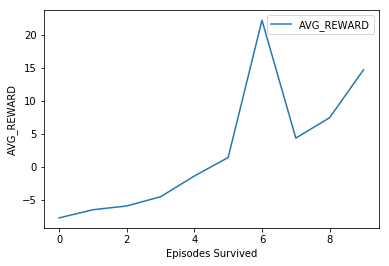

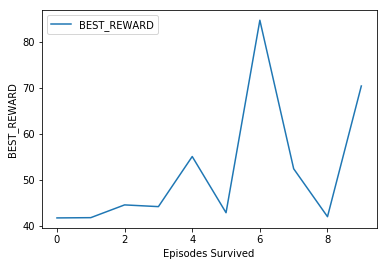

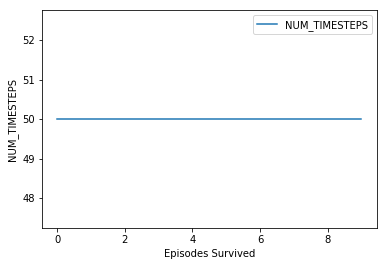

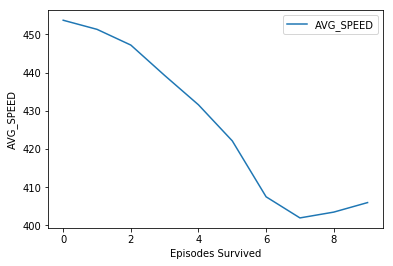

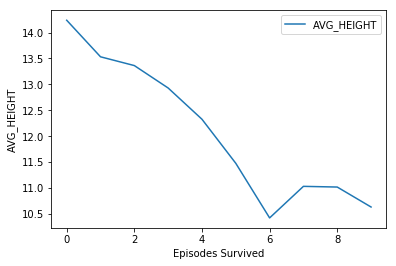

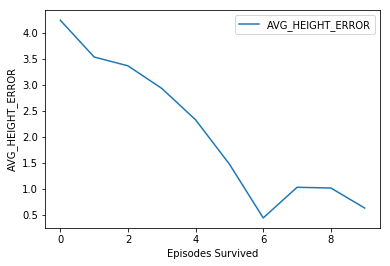

Permutation #: 5
Episode #0: Avg reward: -4.09, Num_Timesteps 50, Avg_speed: 453.08, Avg_Height: 12.71, Avg_Height_Error: 2.71
Episode #1: Avg reward: -3.3, Num_Timesteps 50, Avg_speed: 448.7, Avg_Height: 12.55, Avg_Height_Error: 2.55
Episode #2: Avg reward: -1.89, Num_Timesteps 50, Avg_speed: 449.12, Avg_Height: 12.36, Avg_Height_Error: 2.36
Episode #3: Avg reward: -2.68, Num_Timesteps 50, Avg_speed: 444.85, Avg_Height: 12.35, Avg_Height_Error: 2.35
Episode #4: Avg reward: -0.4, Num_Timesteps 50, Avg_speed: 439.58, Avg_Height: 11.76, Avg_Height_Error: 1.76
Episode #5: Avg reward: 6.97, Num_Timesteps 50, Avg_speed: 432.78, Avg_Height: 10.85, Avg_Height_Error: 0.85
Episode #6: Avg reward: 12.86, Num_Timesteps 50, Avg_speed: 430.81, Avg_Height: 10.88, Avg_Height_Error: 0.88
Episode #7: Avg reward: 10.51, Num_Timesteps 50, Avg_speed: 429.38, Avg_Height: 10.66, Avg_Height_Error: 0.66
Episode #8: Avg reward: 22.66, Num_Timesteps 50, Avg_speed: 426.66, Avg_Height: 10.24, Avg_Height_Error: 0.

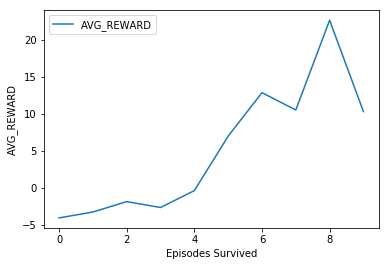

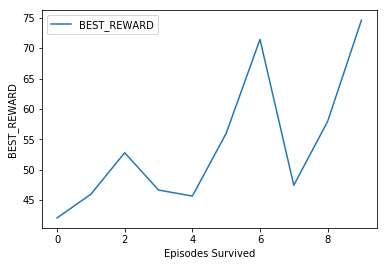

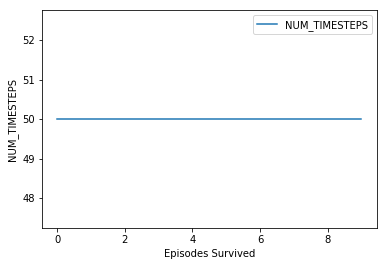

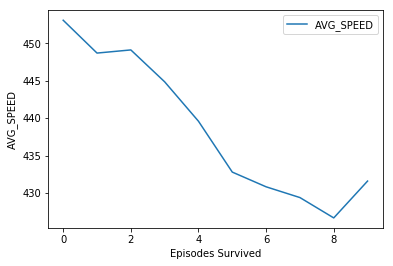

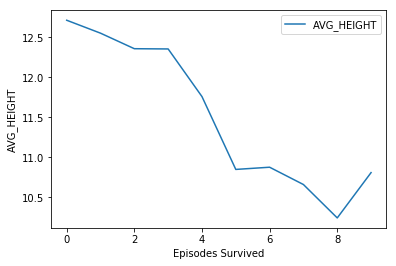

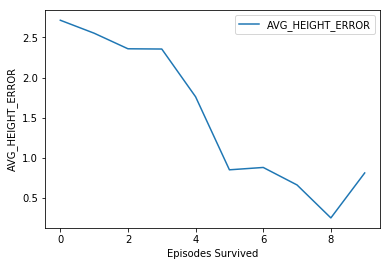

Permutation #: 6
Episode #0: Avg reward: -8.05, Num_Timesteps 50, Avg_speed: 438.23, Avg_Height: 15.06, Avg_Height_Error: 5.06
Episode #1: Avg reward: -11.04, Num_Timesteps 50, Avg_speed: 432.51, Avg_Height: 15.53, Avg_Height_Error: 5.53
Episode #2: Avg reward: -9.62, Num_Timesteps 50, Avg_speed: 432.92, Avg_Height: 14.99, Avg_Height_Error: 4.99
Episode #3: Avg reward: -4.43, Num_Timesteps 50, Avg_speed: 415.22, Avg_Height: 13.18, Avg_Height_Error: 3.18
Episode #4: Avg reward: 5.5, Num_Timesteps 50, Avg_speed: 396.9, Avg_Height: 10.94, Avg_Height_Error: 0.94
Episode #5: Avg reward: 10.77, Num_Timesteps 50, Avg_speed: 383.05, Avg_Height: 9.36, Avg_Height_Error: 0.64
Episode #6: Avg reward: 6.91, Num_Timesteps 50, Avg_speed: 385.57, Avg_Height: 11.27, Avg_Height_Error: 1.28
Episode #7: Avg reward: 2.05, Num_Timesteps 50, Avg_speed: 385.05, Avg_Height: 11.27, Avg_Height_Error: 1.27
Episode #8: Avg reward: 5.35, Num_Timesteps 50, Avg_speed: 382.88, Avg_Height: 11.13, Avg_Height_Error: 1.13

KeyboardInterrupt: 

In [22]:
import tensorflow as tf
all_results = []
        
        
def_gr = tf.get_default_graph()
with def_gr.as_default() as graph:
    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())

        agent, plot_data, num_episodes = try_a_permutation(all_permutations[0], sess=sess)
        agent = None # saving critic isn't working
        all_results.append((permutation, plot_data, num_episodes))
        for n, permutation in enumerate(all_permutations):
            print("Permutation #: {}".format(n))
            # agent.init_actors()
            agent, plot_data, num_episodes = try_a_permutation(permutation, sess=sess, agent=agent)
            agent = None

            all_results.append((permutation, plot_data, num_episodes))

I found that this set of hyperparameters worked well in testing, let's set up the agent for a longer training run and see what it looks like after 50 episodes. Keep everything else the same, i.e. agent will train on target height of 8-12 for each trial, only difference is the number of episodes.


CRITIC_LR
-----------------
1e-05

ACTOR_LR
-----------------
2e-05

CRITIC_UPDATE_RATE
-----------------
0.01

ACTOR_UPDATE_RATE
-----------------
0.005

ACTION_SIZE
-----------------
4

NOISE_RATIO
-----------------
0.05



Episode #0: Avg reward: -3.22, Num_Timesteps 50, Avg_speed: 440.81, Avg_Height: 12.53, Avg_Height_Error: 2.53
Episode #1: Avg reward: 0.8, Num_Timesteps 50, Avg_speed: 438.87, Avg_Height: 12.2, Avg_Height_Error: 2.2
Episode #2: Avg reward: -1.97, Num_Timesteps 50, Avg_speed: 436.44, Avg_Height: 12.19, Avg_Height_Error: 2.19
Episode #3: Avg reward: 4.5, Num_Timesteps 50, Avg_speed: 431.32, Avg_Height: 11.35, Avg_Height_Error: 1.35
Episode #4: Avg reward: 4.21, Num_Timesteps 50, Avg_speed: 420.71, Avg_Height: 11.06, Avg_Height_Error: 1.06
Episode #5: Avg reward: 10.87, Num_Timesteps 50, Avg_speed: 414.1, Avg_Height: 10.42, Avg_Height_Error: 0.42
Episode #6: Avg reward: 4.66, Num_Timesteps 50, Avg_speed: 418.57, Avg_Height: 10.9, Avg_Height_Error: 0.9
Episode #7: Avg reward: 7.79, Num_Timesteps 50, Avg_speed: 420.87, Avg_Height: 10.69, Avg_Height_Error: 0.69
Episode #8: Avg reward: -0.72, Num_Timesteps 50, Avg_speed: 425.24, Avg_Height: 11.81, Avg_Height_Error: 1.81
Episode #9: Avg reward

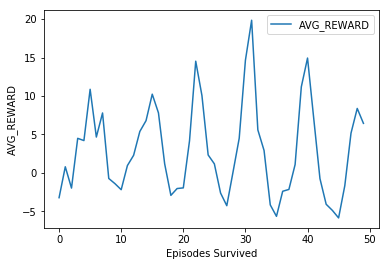

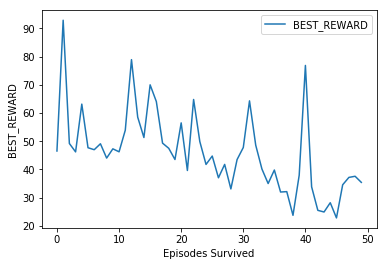

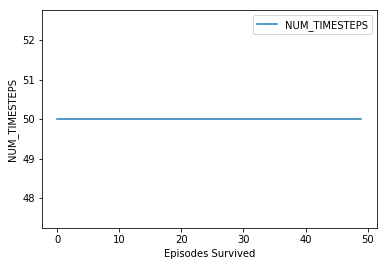

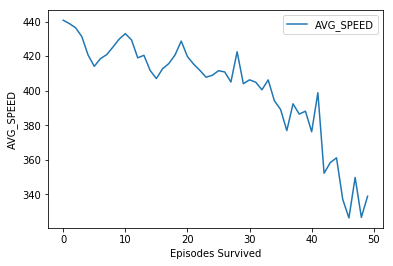

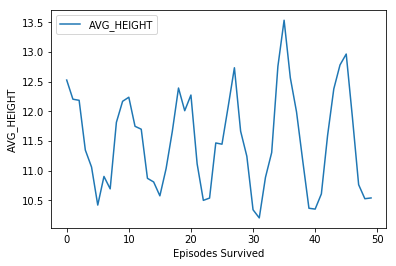

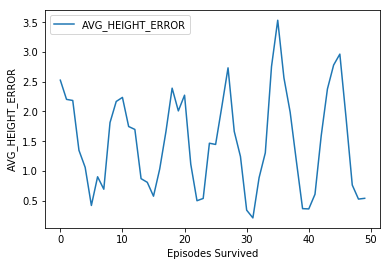

In [25]:
final_permutation = dict(
    critic_lr=1e-05, actor_lr=2e-05, critic_update_rate=0.01, 
    actor_update_rate=0.01, action_size=4, noise_ratio=0.1)

def_gr = tf.get_default_graph()
with def_gr.as_default() as graph:
    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())
        # agent.init_actors()
        agent = None
        agent, plot_data, num_episodes = try_a_permutation(
            final_permutation, sess=sess, agent=agent, num_episodes=50)

        final_result = (final_permutation, plot_data, num_episodes)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Permutation Info:

CRITIC_LR
-----------------
1e-05

ACTOR_LR
-----------------
2e-05

CRITIC_UPDATE_RATE
-----------------
0.01

ACTOR_UPDATE_RATE
-----------------
0.01

ACTION_SIZE
-----------------
4

NOISE_RATIO
-----------------
0.1





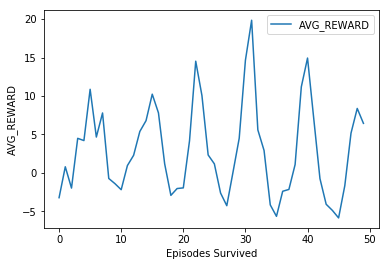

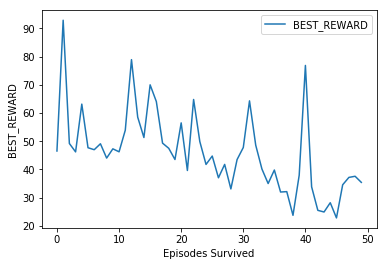

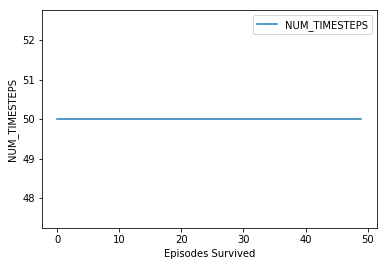

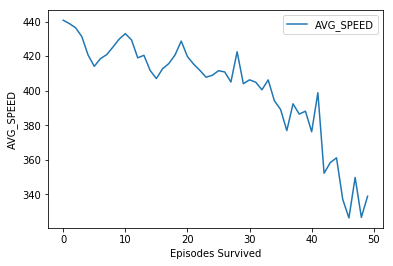

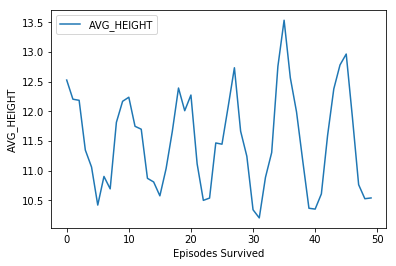

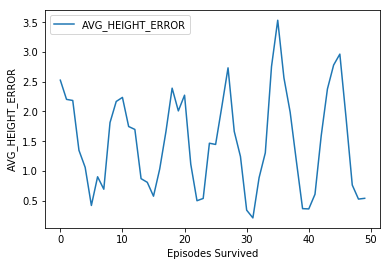

In [27]:

display_permutation_info(final_result[0])
plot_episode_results(final_result[1])


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: Originally, I wanted to define a function to land the copter as that seemed fairly simple.  Rather than defining the reward function as a penalty from the zero point, I decided to define a parametrizable hover height.  The intent is that the copter could be set to hover at a progressively lower height and then disengage.  I penalized positions below the target height more than heights above the target height, and penalized deviations from a neutral orientation.  Eventually, once the network architecture was properly configured, most combinations of hyperparameters yielded promising results within 1,000 timesteps, where they were able to hold a position around 10-12 with a target height of 10 by the end of the test run.

While before I was targeting the copter downward, in preparation for landing I discovered that the subtask of holding any consistent height was itself enough of a task to contend with, so I changed to focus strictly on the hover height aspect and have renamed the task accordingly.  I also added the target height as an input to the model, as well as the difference between current height and target height, in hopes of providing the model as much relevant info as possible.  

Finally I managed to get the copter to hold a target height by setting it near starting height and using very low learning rates.  With this technique, I was able to get the copter to go many timesteps without crashing.  I think that by starting an untrained agent high above the target point, the network was too easily confused by the rewards earned by simply falling. A logical way to continue this training regimen would be to introduce more gradual height deltas between starting and target height, and start to increase the robustness of the agent to this kind of action.

I explored training the agent within a random window of 8-12 target hover height to avoid overfitting to one target height.  I found that this was also successful although the agents were a bit more likely to crash early in training.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used an actor critic model with fairly small layer sizes, only 3 dense layers for the actor and 2 branches of 2 layers each for the critic, with 2 final combined layers.  Although I encountered issues with vanishing gradients in my previous submission, I was able to address this with a leaky relu activation function.  I used truncated normal kernel initialization as that was suggested in keras documentation as suitable for neural networks.

I did a walk through model update increment, learning rate, and action size parameters.  Eventually I found that a very small learning rate, around .00001, worked well.  I tried noise ratios from .05 - 0.25.  0.25 seemed like a risky proposition -- many of those trials crashed and failed, while a few, got lucky and found decent solutions even more quickly than a typical agent.  Still my experience was that it was worth setting this lower.

For gamma, I lookat at .9 - .99.  0.95 seemed to work well.  Probably there is still more room to explore the impact of this parameter.

I used a clipnorm of 0.1 and that seemed to handle the vanishing gradients well.

I used a memory of experiences and trained on them after each batch of interactions.  Every few interactions (I experimented with values from 3-10), the target actor and critic models are incrementally updated toward the active actor and critic models.  I would definitely like to experiment more with the types of memory storage and training, but I'd like to do it on a simpler task.

Often there is a temporary spike in final speed when the model weights have nearly gone to zero.  (A "dead cat bounce" in finance parlance.) Possibly this is due to the reward function starting to incentivize upward motion when below the target height and temporarily reviving the dying weights before they finally expire.  This tends to suggest that maybe the network is in fact picking up some feedback from the reward function, and maybe it could be adjusted to more appropriately guide the behavior.  

I added gradient clipping and leaky relu activations to avoid dying weights.  I also think I fixed a math error where I was using unscaled rotor speeds in the critic's evaluation instead of action logits, causing the critic's feedback to push the actor to 0.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: Honestly I have not been able to get particularly good performance so far.  Average reward does rise over the course of a trial, but that could be a consequence of the model weights dying out and the copter more quickly dropping to the target height and beyond over time.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)


- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

I certainly would like to experiement a lot more with storing memories and choosing / prioritizing examples for training.  This is definitely an underdeveloped part of this particular project.

Math and concepts were comparatively simple, all things considered.  I was actually surprised how well I followed the discrete Q calculation tasks.  The difficult part was getting anything to run.  most of the code required investigating multiple issues, exceptions, and extensive research.  also a lot of cutting-edge concepts were dealt with only briefly at the end, and I think I still need a lot more time to explore and absorb them.

What was very difficult was getting codebase and platform to work:

keras doesn't like np arrays of len X as input to node with shape `[None, X]`

tf.gradients doesn't recognize dependencies between nodes in keras model even though they exist and silently returns none

when visualizing a tensorflow graph to verify the dependencies between the aforementioned nodes (how could they possibly not -- they are model inputs and outputs), it can only be crammed into a tiny Jupyter notebook cell and can only be viewed a tiny piece at a time as if through a microscope

workspace gets out of synch and stops importing most recent file or saving progress, frequently rolling back the code to some uncertain state in the past -- imports have weird errors that seem to be from my code but go away after a reset, leading to fruitless investigations

that said I am used to dealing with technical headaches -- typically it far outweights the "fun stuff" in most technical endeavours

When it came to actually putting together the network and trying to get it to run, I definitely appreciated the abstractions provided by Keras as opposed to the less user-friendly tensorflow.  However, I'm glad I got to use tensorflow itself in more of the other projects I've finished previously.

I thought it was interesting that I saw a advance/retreat pattern in the longer learning session.  The agent would reach new highs, then recede to relatively poor performance, then reach new highs again.  I'm not sure exactly why that is.  I would think that would be due to adapting to new target weights, but I am updating target weights every episode, and this cycle occurs every 6-7 episodes or so.  The graphs in general display an oscillating character where the agent swings between two extremes of a range that is near the hover point.  Possibly the reward function needs to be tweaked, and if this were a task I was pursuing to full fruition, I would certainly set up the visualizer to see what these different trials look like in concrete terms.

I do seem to still see a gradual trend toward declining output speeds, suggesting the network is still gradually dying out somewhere.  This will be something to look into further.

